In [65]:
#models <- c('m1','m2','m3','m4','m5','m6')
models <- c('m5','m7')

SF=ZN <- list()
for(i in 1:length(models)){
    SF[[i]] <- read.csv(paste('fit',models[i],'seaflow.csv',sep='_'))
    ZN[[i]] <- read.csv(paste('fit',models[i],'zinser.csv',sep='_'))
}

In [141]:
pars <- c('delta_max','gamma_max','rho_max','E_star','divrate')

PARS_sf=PARS_zn   <- array(NA,dim=c(dim(ZN[[1]])[1],length(pars),length(models)))
#colnames(pars_sf)=colnames(pars_zn) <- pars
for(j in 1:length(models)){
    pars_sf=pars_zn                     <- matrix(NA,dim(ZN[[1]])[1],length(pars))
    colnames(pars_sf)=colnames(pars_zn) <- pars
    for(i in 1:length(pars)){
        pars_sf[,i] <- SF[[j]][,grep(pars[i],colnames(SF[[j]]))]
        pars_zn[,i] <- ZN[[j]][,grep(pars[i],colnames(ZN[[j]]))]
    }
    PARS_sf[,,j] <- pars_sf
    PARS_zn[,,j] <- pars_zn
}


In [142]:
par_names <- c(expression(delta['max']),expression(gamma['max']),expression(rho['max']),expression('E'^'*'),expression('Division Rate'))


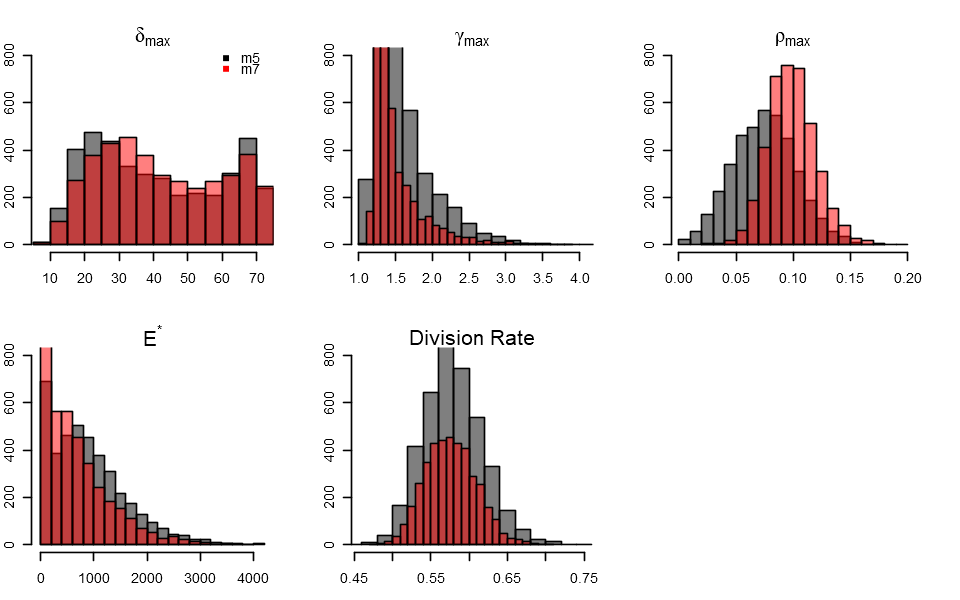

In [155]:
options(repr.plot.width=8, repr.plot.height=5)
par(mfrow=c(2,3),mar=c(3,2,3,3))
for(i in 1:length(pars)){
     hist(PARS_sf[,i,1],main='',breaks=20,xlab='',freq=TRUE,
          xlim=range(c(PARS_sf[,i,])),col=adjustcolor('black',alpha.f=0.5),ylim=c(0,800))
    if(length(models)>1){ 
    for(j in 2:length(models)){
         hist(PARS_sf[,i,j],main='',,breaks=20,xlab='',freq=TRUE,col=adjustcolor(j,alpha.f=0.5),add=TRUE)
     }
        }
     mtext(par_names[i])
     if(i==1)
         legend('topright',legend=models,col=1:length(models),pch=15,bty='n')
 }


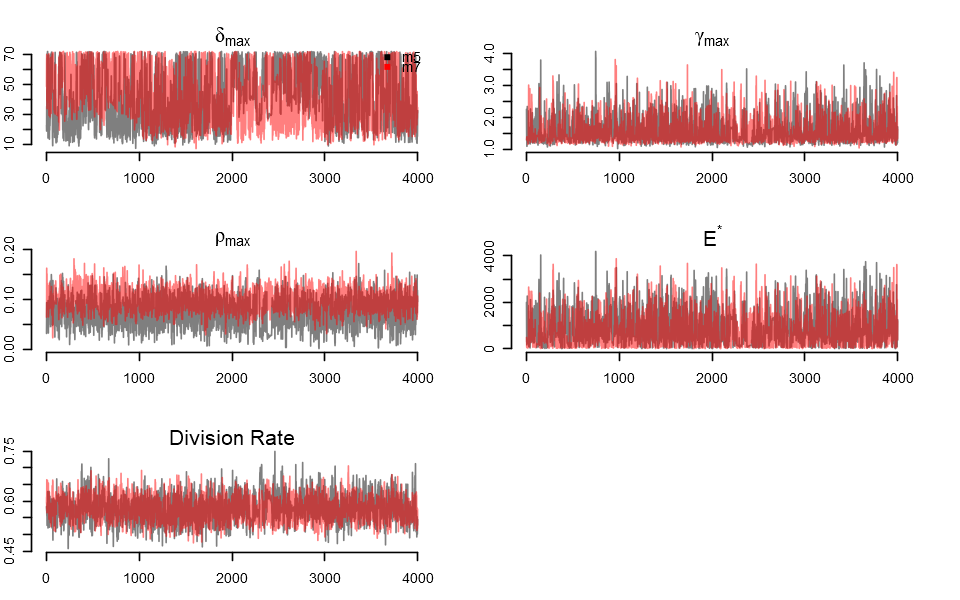

In [157]:
options(repr.plot.width=8, repr.plot.height=5)
par(mfrow=c(3,2),mar=c(3,2,3,3))
 for(i in 1:length(pars)){
     plot(PARS_sf[,i,1],main='',type='l',xlab='',col=adjustcolor('black',alpha.f=0.5),bty='n',ylim=range(c(PARS_sf[,i,])))
     if(length(models)>1){
     for(j in 2:length(models)){
         lines(PARS_sf[,i,j],col=adjustcolor(j,alpha.f=0.5))
     }
     mtext(par_names[i])
         }
     if(i==1)
         legend('topright',legend=models,col=1:length(models),pch=15,bty='n')
 }


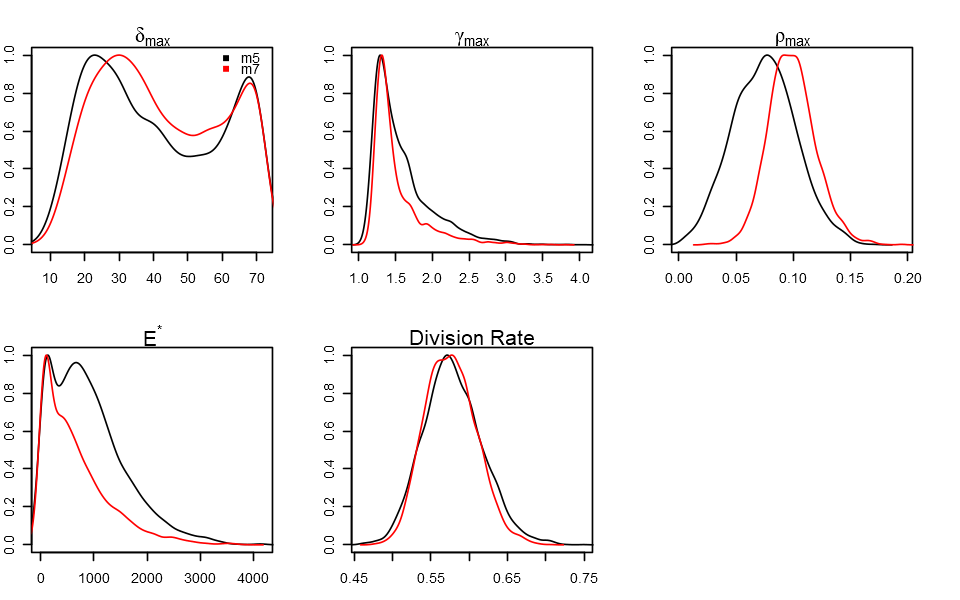

In [158]:
options(repr.plot.width=8, repr.plot.height=5)
par(mfrow=c(2,3),mar=c(3,2,3,3))
for(i in 1:length(pars)){
    xtmp <- PARS_sf[,i,1]
    d <- density(xtmp)
    plot(d$x,d$y/max(d$y),xlab='', xlim=range(c(PARS_sf[,i,])),col='black',type='l')
    for(j in 2:length(models)){
        xtmp <- PARS_sf[,i,j] 
        d <- density(xtmp)
        lines(d$x,d$y/max(d$y),col=j)
    }
    mtext(par_names[i])
    if(i==1)
        legend('topright',legend=models,col=1:length(models),pch=15,bty='n')
}


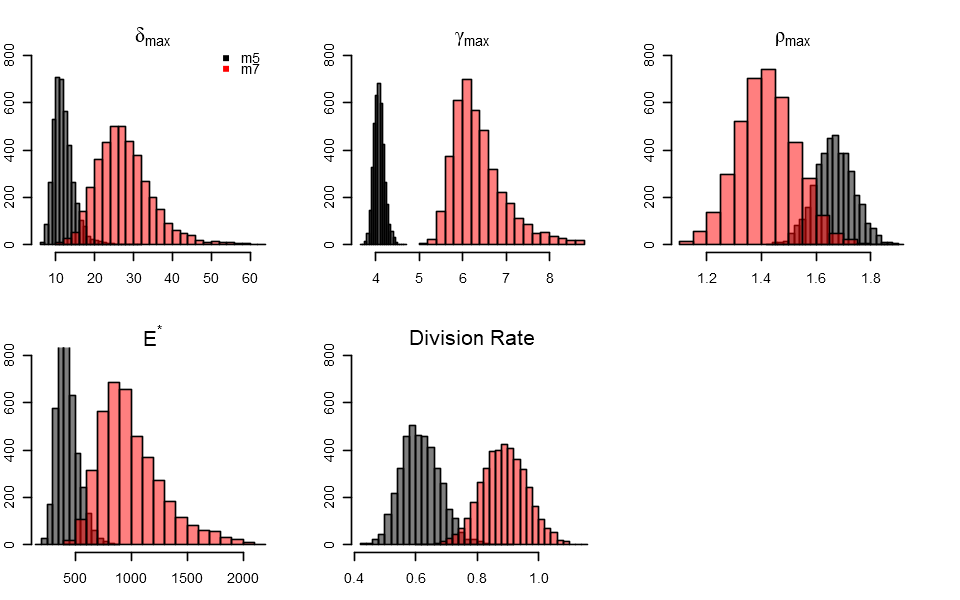

In [148]:
options(repr.plot.width=8, repr.plot.height=5)
par(mfrow=c(2,3),mar=c(3,2,3,3))
for(i in 1:length(pars)){
    hist(PARS_zn[,i,1],main='',breaks=20,xlab='',freq=TRUE,xlim=range(c(PARS_zn[,i,])),col=adjustcolor('black',alpha.f=0.5),
        ylim=c(0,800))
    for(j in 2:length(models)){
        hist(PARS_zn[,i,j],main='',,breaks=20,xlab='',freq=TRUE,col=adjustcolor(j,alpha.f=0.5),add=TRUE)
    }
    mtext(par_names[i])
    if(i==1) legend('topright',legend=models,col=1:length(models),pch=15,bty='n')
    if(i==6) abline(v=0.63,lty=2,lwd=2)
}

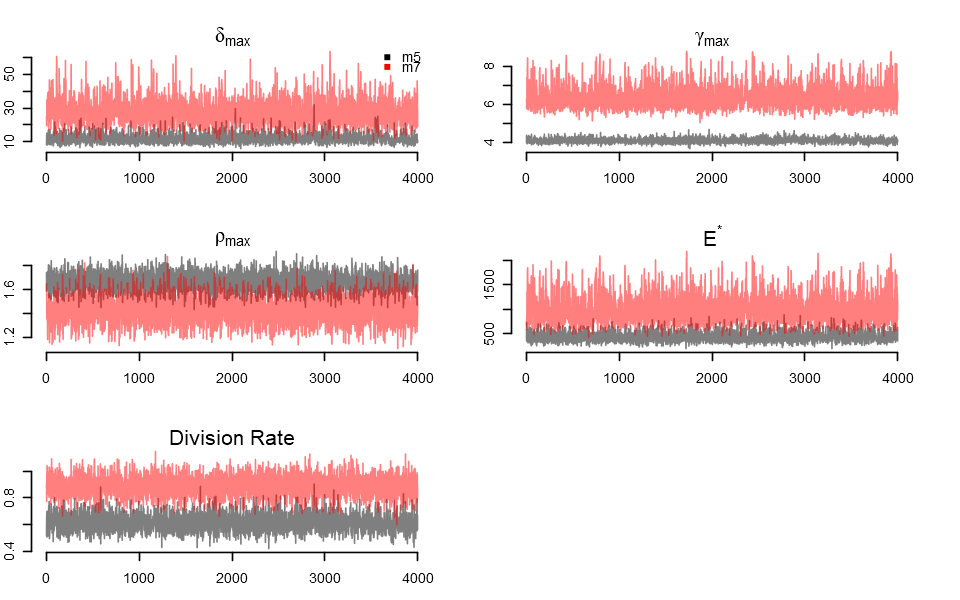

In [159]:
options(repr.plot.width=8, repr.plot.height=5)
par(mfrow=c(3,2),mar=c(3,2,3,3))
 for(i in 1:length(pars)){
     plot(PARS_zn[,i,1],main='',type='l',xlab='',col=adjustcolor('black',alpha.f=0.5),bty='n',ylim=range(c(PARS_zn[,i,])))
     if(length(models)>1){
     for(j in 2:length(models)){
         lines(PARS_zn[,i,j],col=adjustcolor(j,alpha.f=0.5))
     }
     mtext(par_names[i])
         }
     if(i==1)
         legend('topright',legend=models,col=1:length(models),pch=15,bty='n')
 }

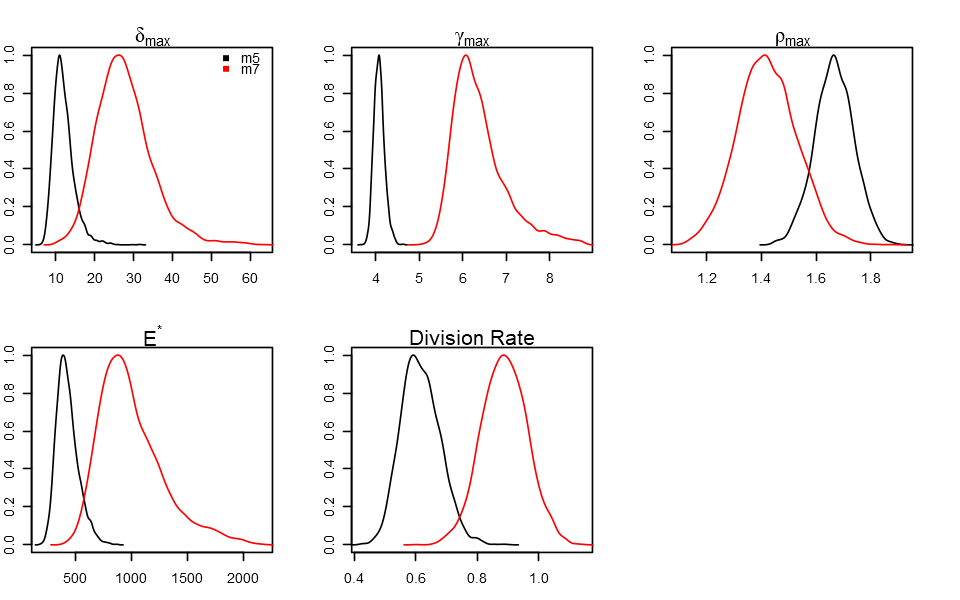

In [149]:
 options(repr.plot.width=8, repr.plot.height=5)
 par(mfrow=c(2,3),mar=c(3,2,3,3))
 for(i in 1:length(pars)){
    xtmp <- PARS_zn[,i,1]
    d <- density(xtmp)
    plot(d$x,d$y/max(d$y),xlab='', xlim=range(c(PARS_zn[,i,])),col='black',type='l')
    for(j in 2:length(models)){
        xtmp <- PARS_zn[,i,j] 
        d <- density(xtmp)
        lines(d$x,d$y/max(d$y),col=j)
    }
    mtext(par_names[i])
    if(i==1)
        legend('topright',legend=models,col=1:length(models),pch=15,bty='n')
 }

In [17]:
# pars <- c('log_like_test','lp__')

#ll_sf=ll_zn   <- array(NA,dim=c(dim(ZN[[1]])[1],length(pars),length(models)))
#colnames(pars_sf)=colnames(pars_zn) <- pars
#for(j in 1:length(models)){
#    pars_sf=pars_zn                     <- matrix(NA,dim(ZN[[1]])[1],length(pars))
#    colnames(pars_sf)=colnames(pars_zn) <- pars
#    for(i in 1:length(pars)){
#        pars_sf[,i] <- SF[[j]][,grep(pars[i],colnames(SF[[j]]))]
#        pars_zn[,i] <- ZN[[j]][,grep(pars[i],colnames(ZN[[j]]))]
#    }
#    ll_sf[,,j] <- pars_sf
#    ll_zn[,,j] <- pars_zn
#}

In [18]:
#options(repr.plot.width=8, repr.plot.height=3)
#par(mfrow=c(1,2),mar=c(3,2,3,3))

#    hist(ll_sf[,1,1],main='',breaks=20,xlab='',freq=TRUE,col=adjustcolor('black',alpha.f=0.5),ylim=c(0,800))
#    hist(ll_sf[,1,2],main='',,breaks=20,xlab='',freq=TRUE,col=adjustcolor(j,alpha.f=0.5),add=TRUE)
#        mtext('Likelihood of test set (SeaFlow)')
#        legend('topright',legend=models,col=1:length(models),pch=15,bty='n')

#    hist(ll_zn[,1,1],main='',breaks=30,xlab='',freq=TRUE,col=adjustcolor('black',alpha.f=0.5), ylim=c(0,800))
#    hist(ll_zn[,1,2],main='',,breaks=30,xlab='',freq=TRUE,col=adjustcolor(j,alpha.f=0.5),add=TRUE)
#        mtext('Likelihood of test set (Zinser)')

In [50]:
#prior[[j]][,grep(pars[i],colnames(prior[[j]]))]
#PRIOR   <- array(NA,dim=c(dim(prior[[1]])[1],length(pars),length(models)))
#length(PRIOR[,1,1])
#dim(PRIOR)
#j=1
#i=1
#prior[[j]][,grep(pars[i],colnames(prior[[j]]))]
#dim(prior[[j]])
#grep(pars[i],colnames(prior[[j]]))
#colnames(prior[[2]])

In [81]:
#models <- c('m1','m2','m3','m4','m5','m6')
models <- c('m5','m7')

prior <- list()
for(i in 1:length(models_p)){
    prior[[i]] <- read.csv(paste('prior_',models[i],'.csv',sep=''))
}

In [83]:
#colnames(prior[[i]])

In [84]:
pars <- c('delta_max','gamma_max','rho_max','E_star','divrate')

PRIOR   <- array(NA,dim=c(dim(prior[[1]])[1],length(pars),length(models)))
#colnames(pars_sf)=colnames(pars_zn) <- pars
for(j in 1:length(models_p)){
    for(i in 1:length(pars)){
        PRIOR[,i,j] <- prior[[j]][,grep(pars[i],colnames(prior[[j]]))]
    }
}



In [ ]:
#m5_prior <- read.csv(paste('prior_','m1p','.csv',sep=''))
#m5_prior <- read.csv(paste('prior_','m2p','.csv',sep=''))

In [61]:
#m1_div_prior <- m1_prior[,colnames(m1_prior)=='divrate']
#m2_div_prior <- m2_prior[,colnames(m2_prior)=='divrate']

[1] 4000    5    2

In [122]:
#KL.divergence(PARS_sf[,i,1],PRIOR[,i,1],5)
KL.divergence(PRIOR[,i,1],PARS_sf[,i,1],20)

[1]      Inf      Inf      Inf      Inf      Inf 3.008450 2.907375 2.837376
 [9] 2.750668 2.687000 2.619511 2.567226 2.511762 2.462656 2.417175 2.376076
[17] 2.338099 2.307170 2.276014 2.243432

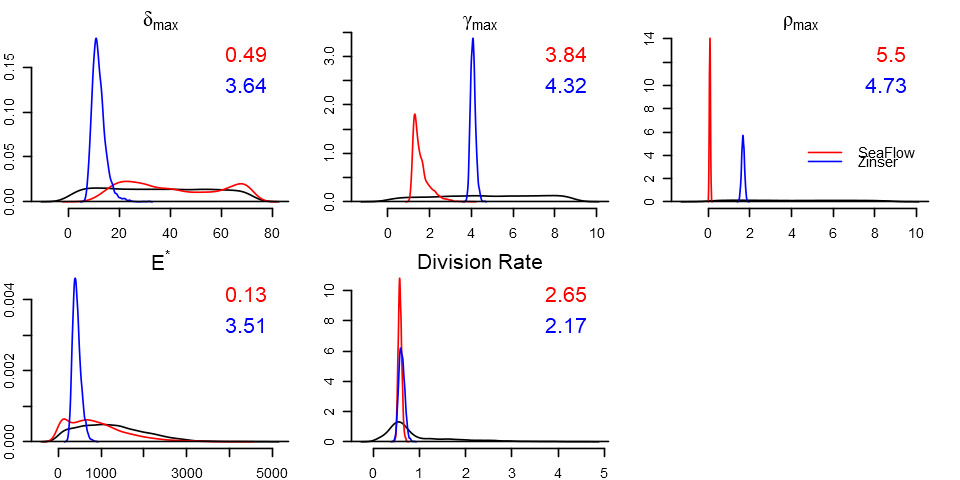

In [170]:
library(FNN)
options(repr.plot.width=8, repr.plot.height=4)

par(mfrow=c(2,3),mar=c(2,2,2,2))   

for(i in 1:dim(PRIOR)[2]){
    rng <- range(PRIOR[,i,1])
    #brk <- seq(rng[1]-0.5*rng[1],rng[2]+0.2*rng[2],length.out=40)
    prir <- density(PRIOR[,i,1])
    post_sf <- density(PARS_sf[,i,1])
    post_zn <- density(PARS_zn[,i,1])
    plot(prir$x,prir$y,type='l',ylim=range(c(prir$y,post_sf$y,post_zn$y)),bty='n')
    lines(post_sf$x,post_sf$y,col='red')
    lines(post_zn$x,post_zn$y,col='blue')
    abline(h=0)
   
    #hist(PRIOR[,i,1],main='',freq=FALSE,col=adjustcolor('black',alpha.f=0.5),breaks=brk)
    #hist(PARS_sf[,i,1],add=TRUE,freq=FALSE,col=adjustcolor('red',alpha.f=0.5),breaks=brk)
    #d <- density(PRIOR[,i,1])
    #lines(d$x,d$y, col='black',type='l')
    mtext(par_names[i])
    mtext(paste(round(median(KL.divergence(PRIOR[,i,1],PARS_sf[,i,1],20)),2)),adj=0.9,col='red',line=-2)
    mtext(paste(round(median(KL.divergence(PRIOR[,i,1],PARS_zn[,i,1],20)),2)),adj=0.9,col='blue',line=-4)
    if(i==3) legend(4,5,legend=c('SeaFlow','Zinser'),lty=1,col=c('red','blue'),bty='n',cex=1.1)
    #mtext(paste(round(mean(KL.divergence(post_zn,rnorm(4000,mean=1000,sd=1000))),3)),adj=1,col='blue',line=-2)
}
